In [11]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score

In [2]:
dataset = datasets.load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size=0.2,random_state=0)

In [4]:
#finding best K for training data
x_axis = []
y_axis = []
for i in range(1,25,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf,x_train,y_train)
    x_axis.append(i)
    y_axis.append(score.mean()) 

<function matplotlib.pyplot.show(*args, **kw)>

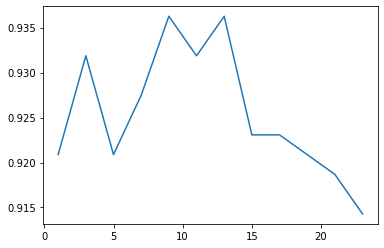

In [5]:
import matplotlib.pyplot as plt 
plt.plot(x_axis,y_axis)
plt.show

In [7]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9473684210526315

In [8]:
'''Implementation of KNN from scratch'''
def step_predict(x,y,x_test_data,k):
    distances = []
    for i in range(len(x)):
        distance = ((x[i,:]-x_test_data)**2).sum()
        distances.append([distance,i])
    distances = sorted(distances)
    target = []
    for i in range(k):
        target.append(y[distances[i][1]])

    return Counter(target).most_common(1)[0][0]

In [9]:
def predict(x_train,y_train,x_test,k):
    y_pred = []
    for x in x_test:
        y_pred.append(step_predict(x_train,y_train,x,k))
    return y_pred

In [ ]:
y_pred=predict(x_train,y_train,x_test,7)
accuracy_score(y_test,y_pred)